# importing  libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data preprocessing

# Training image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetables_recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 3115 files belonging to 36 classes.


# validation image preprocesisng

In [4]:
validation_set =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetables_recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 351 files belonging to 36 classes.


# Building Model

In [5]:
cnn = tf.keras.models.Sequential()

# Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting

In [13]:
# output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# Compiling and Training Phase

In [14]:

cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [16]:
training_history= cnn.fit(x=training_set, validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 547s 5s/step - loss: 4.1224 - accuracy: 0.0594 - val_loss: 3.1997 - val_accuracy: 0.0826
Epoch 2/32
98/98 [==============================] - 145s 1s/step - loss: 3.0902 - accuracy: 0.1159 - val_loss: 2.6104 - val_accuracy: 0.2450
Epoch 3/32
98/98 [==============================] - 142s 1s/step - loss: 2.8225 - accuracy: 0.1823 - val_loss: 2.2190 - val_accuracy: 0.3447
Epoch 4/32
98/98 [==============================] - 134s 1s/step - loss: 2.5613 - accuracy: 0.2379 - val_loss: 1.8690 - val_accuracy: 0.3989
Epoch 5/32
98/98 [==============================] - 151s 1s/step - loss: 2.4273 - accuracy: 0.2803 - val_loss: 1.6756 - val_accuracy: 0.5043
Epoch 6/32
98/98 [==============================] - 142s 1s/step - loss: 2.2875 - accuracy: 0.3165 - val_loss: 1.7394 - val_accuracy: 0.5014
Epoch 7/32
98/98 [==============================] - 145s 1s/step - loss: 2.1307 - accuracy: 0.3573 - val_loss: 1.3161 - val_accuracy: 0.5869
Epoch 8/32
98

# Saving Model


In [17]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
training_history.history # return dictionary of history

{'loss': [4.122364521026611,
  3.090242624282837,
  2.822514772415161,
  2.561338424682617,
  2.427283525466919,
  2.287532329559326,
  2.130722999572754,
  1.9251885414123535,
  1.7343347072601318,
  1.5899165868759155,
  1.4879169464111328,
  1.252130389213562,
  1.1168744564056396,
  0.9985724687576294,
  0.9193788766860962,
  0.7615923881530762,
  0.7959750890731812,
  0.6026002764701843,
  0.5799503922462463,
  0.564174473285675,
  0.45490020513534546,
  0.428139865398407,
  0.38279953598976135,
  0.4174213409423828,
  0.3306502401828766,
  0.29254502058029175,
  0.3904378116130829,
  0.3050878942012787,
  0.2198261171579361,
  0.2351950705051422,
  0.22527499496936798,
  0.25236472487449646],
 'accuracy': [0.059390049427747726,
  0.11589085310697556,
  0.1823434978723526,
  0.23788121342658997,
  0.28025680780410767,
  0.3165329098701477,
  0.3573033809661865,
  0.42407703399658203,
  0.47576242685317993,
  0.519422173500061,
  0.5489566326141357,
  0.6112359762191772,
  0.653290

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Accuracy of Model Achieved on validation set

In [21]:
print('validation set Accuracy:{} %'.format(training_history.history['val_accuracy'][-1]))

validation set Accuracy:0.94017094373703 %


# Accuracy Visualization

# Training Visualization

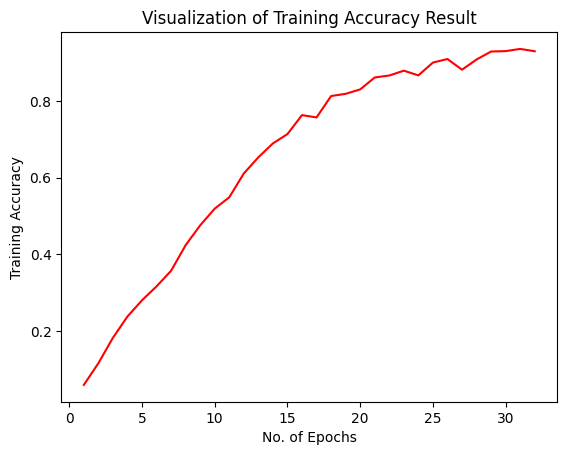

In [22]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

# Validation Accuracy


# evaluating CNN Model

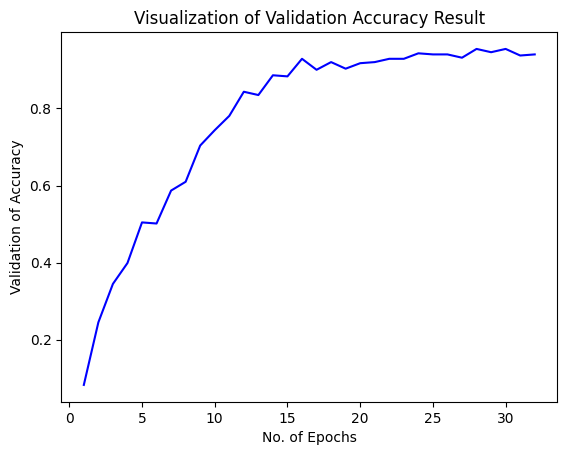

In [23]:





plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation of Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [25]:
training_loss,training_accuracy = cnn.evaluate(training_set)

98/98 [==============================] - 104s 1s/step - loss: 0.2569 - accuracy: 0.9368


In [26]:
val_loss,val_accuracy = cnn.evaluate(validation_set)

11/11 [==============================] - 24s 401ms/step - loss: 0.4540 - accuracy: 0.9402


# Test set Evaluation

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetables_recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 359 files belonging to 36 classes.


In [28]:
test_loss,test_accuracy = cnn.evaluate(test_set)

12/12 [==============================] - 45s 737ms/step - loss: 0.4441 - accuracy: 0.9415
